In [ ]:
!pip install nbconvert


In [ ]:
!jupyter nbconvert --to html "/content/drive/MyDrive/Colab Notebooks/Task 1-Grad_2025_InTake.ipynb"


[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Task 1-Grad_2025_InTake.ipynb to html
[NbConvertApp] Writing 1148127 bytes to /content/drive/MyDrive/Colab Notebooks/Task 1-Grad_2025_InTake.html


In [ ]:
from google.colab import files
files.download('/content/drive/MyDrive/Colab Notebooks/Task 1-Grad_2025_InTake.html')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

If you're using the notebook locally (outside Colab), make sure to set the path to your local files where your data is stored. You can use relative or absolute paths to refer to your files:

In [ ]:
# Use local file path in your local machine (if the notebook is running locally)
#file_path = 'path_to_your_local_file/your_file.xlsx'

# Load the file using pandas
#import pandas as pd
#data = pd.read_excel(file_path)


If you're using the notebook in Colab, make sure to set the path to your gdrive path where your data is stored.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
#Here I just gave my gdrive path where i saved my data folder so you can run it by replacing the file path
file_path = '/content/drive/MyDrive/Colab Notebooks/Quantitative_Task_-_Data_Analysis_-_Auction.xlsx'
data = pd.ExcelFile(file_path)

In [ ]:
sheet_names =data.sheet_names
sheet_names

['Definitions', 'Cost', 'Value Info', 'Demographic Info']

In [ ]:
# Load the relevant sheets into dataframes for further inspection
cost_df = pd.read_excel(file_path, sheet_name='Cost')
value_info_df = pd.read_excel(file_path, sheet_name='Value Info')
demographic_info_df = pd.read_excel(file_path, sheet_name='Demographic Info')

# Display the first few rows of each dataframe to understand their structure
(cost_df.head(), value_info_df.head(), demographic_info_df.head())


(       Month  Paid Search  Affiliates
 0 2013-01-01     41512.00       16421
 1 2013-02-01     61243.00       42101
 2 2013-03-01     84597.88      141321,
    Customer ID  1st Order Profit  Subsequent Order Profit  \
 0            1           8.97261                  5.30772   
 1            2           7.92288                 70.15680   
 2            3          14.06160                 50.80320   
 3            4          14.07672                  0.00000   
 4            5          22.68000                 68.22144   
 
    Subsequent Orders Count  Total value of all promotions  
 0                        1                       6.600000  
 1                        7                       6.639453  
 2                        7                       0.000000  
 3                        0                       0.000000  
 4                        9                      14.771948  ,
    Customer ID Title Date Of Birth Address City Contact Allowed  \
 0            1    Mr    1973-06-2

In [ ]:
# Round off all the numeric columns in the 'Value Info' dataframe.This will ensure my analysis starts with cleaner data.
value_info_df = value_info_df.round()
value_info_df.head()

,Customer ID,1st Order Profit,Subsequent Order Profit,Subsequent Orders Count,Total value of all promotions
0,1,9.0,5.0,1,7.0
1,2,8.0,70.0,7,7.0
2,3,14.0,51.0,7,0.0
3,4,14.0,0.0,0,0.0
4,5,23.0,68.0,9,15.0


In [ ]:
# Display the first few rows of each dataframe to understand their structure
(cost_df.head(), value_info_df.head(), demographic_info_df.head())

(       Month  Paid Search  Affiliates
 0 2013-01-01     41512.00       16421
 1 2013-02-01     61243.00       42101
 2 2013-03-01     84597.88      141321,
    Customer ID  1st Order Profit  Subsequent Order Profit  \
 0            1               9.0                      5.0   
 1            2               8.0                     70.0   
 2            3              14.0                     51.0   
 3            4              14.0                      0.0   
 4            5              23.0                     68.0   
 
    Subsequent Orders Count  Total value of all promotions  
 0                        1                            7.0  
 1                        7                            7.0  
 2                        7                            0.0  
 3                        0                            0.0  
 4                        9                           15.0  ,
    Customer ID Title Date Of Birth Address City Contact Allowed  \
 0            1    Mr    1973-06-2

In [ ]:
#Lets start analysing the avg profit based on the source of customer. We'll group data by the customer acquisition source and calculate
# Merge the Value Info and Demographic Info data on 'Customer ID' for analysis
merged_data_df = pd.merge(value_info_df, demographic_info_df, on='Customer ID')

merged_data_df.head()

,Customer ID,1st Order Profit,Subsequent Order Profit,Subsequent Orders Count,Total value of all promotions,Title,Date Of Birth,Address City,Contact Allowed,Registration Date,Source of Customer
0,1,9.0,5.0,1,7.0,Mr,1973-06-29,Malahide,Y,2013-01-01 00:23:00,Organic Search
1,2,8.0,70.0,7,7.0,Mr,1984-07-25,Dublin,Y,2013-01-01 00:30:00,Affiliates
2,3,14.0,51.0,7,0.0,Mr,1991-05-01,Dublin,Y,2013-01-01 01:09:00,Paid Social
3,4,14.0,0.0,0,0.0,Mr,1986-11-30,Dublin,N,2013-01-01 01:19:00,Affiliates
4,5,23.0,68.0,9,15.0,Mr,1991-10-02,Limerick,Y,2013-01-01 01:58:00,Paid Search


## Channel Performance and Customer Profitability Analysis

In [ ]:
#once we merged the data lets calculaye the avg profit and order counts based on source of customer
# Group by 'Source of Customer' to analyze channel performance
channel_performance = merged_data.groupby('Source of Customer').agg(
    avg_first_order_profit=('1st Order Profit', 'mean'),
    avg_subsequent_order_profit=('Subsequent Order Profit', 'mean'),
    sum_subsequent_orders=('Subsequent Orders Count', 'sum'),
    sum_total_promotions=('Total value of all promotions', 'sum')
).reset_index()


In [ ]:
print(channel_performance)

  Source of Customer  avg_first_order_profit  avg_subsequent_order_profit  \
0         Affiliates                7.920660                    28.897231   
1             Direct               10.802303                    38.069920   
2     Organic Search               11.093949                    38.830353   
3        Paid Search               10.926346                    37.225999   
4        Paid Social               13.828488                    48.445494   

   sum_subsequent_orders  sum_total_promotions  
0                  15789               24747.0  
1                  44067               69762.0  
2                  33339               54262.0  
3                  24905               39771.0  
4                   5919                9505.0  


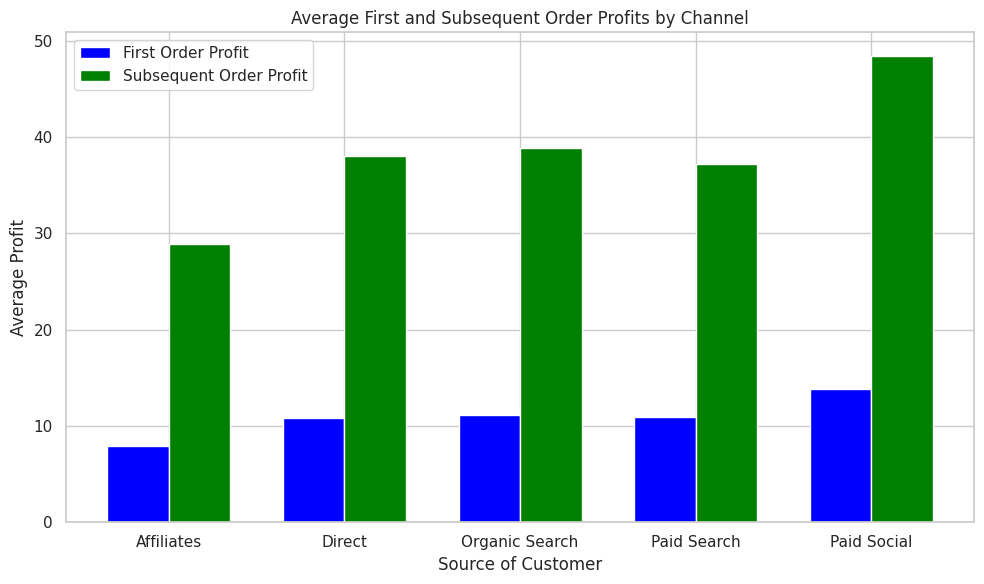

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


# Data from the channel_performance DataFrame
channels = channel_performance['Source of Customer']
first_order_profit = channel_performance['avg_first_order_profit']
subsequent_order_profit = channel_performance['avg_subsequent_order_profit']

# Define bar width and positions for the bars
bar_width = 0.35
index = np.arange(len(channels))

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the first-order profit bars
ax.bar(index, first_order_profit, bar_width, label='First Order Profit', color='blue')

# Plot the subsequent-order profit bars next to the first-order profits
ax.bar(index + bar_width, subsequent_order_profit, bar_width, label='Subsequent Order Profit', color='green')

# Set titles and labels
ax.set_title('Average First and Subsequent Order Profits by Channel')
ax.set_xlabel('Source of Customer')
ax.set_ylabel('Average Profit')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(channels)

# Add a legend
ax.legend()

# Display the static plot
plt.tight_layout()
plt.show()


This gives a clear comparison of profitability between different channels, helping identify which sources drive the most profit in terms of both first-time and repeat purchases.
From this analysis, we can observe differences in profitability and customer behavior across the channels. Key takeaways might include:

*   **Paid Social** appears to generate the highest average subsequent order profit and average first-order profit.This indicates that customers acquired through Paid Social tend to place high-value orders both initially and during subsequent purchases.
*   **Direct and Organic Search** have similar performance in terms of first-order and subsequent order profits, though Paid Social stands out slightly in these areas.
*   **Affiliates** have lower average subsequent order profit compared to other channels, suggesting that customers acquired through affiliates may not perform as strongly on average.





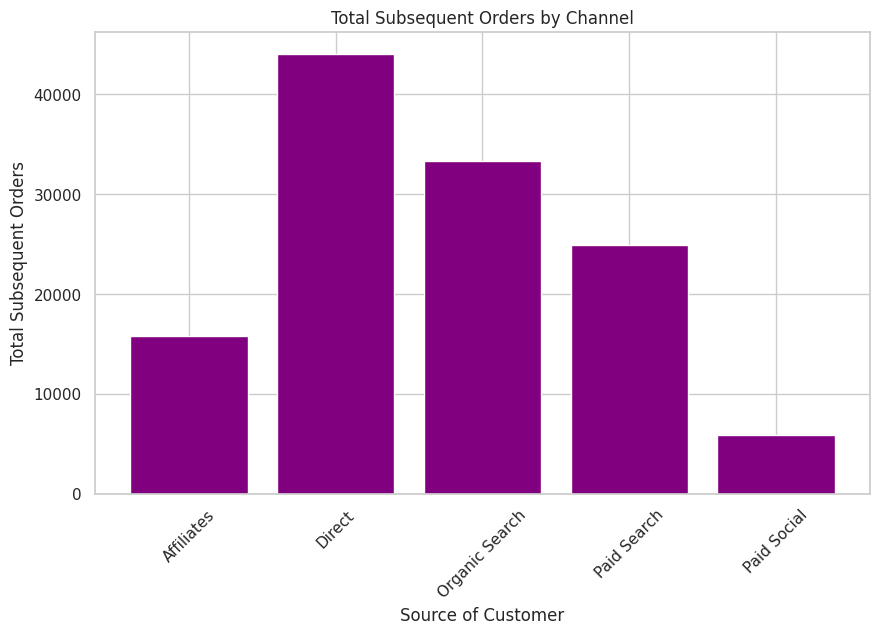

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# Data for the plot
channels = channel_performance['Source of Customer']
subsequent_orders = channel_performance['sum_subsequent_orders']

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(channels, subsequent_orders, color='purple')

# Customize the layout
plt.title('Total Subsequent Orders by Channel')
plt.xlabel('Source of Customer')
plt.ylabel('Total Subsequent Orders')

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45)

# Display the static plot
plt.show()


This chart shows the total subsequent orders for each channel to compare the total volume of orders generated from each customer source.
 Key takeaways might include:


1.  **Direct Channel Dominates in Volume:**


*   The Direct channel has the highest total number of subsequent orders. This suggests that many customers who visit the website directly (e.g., typing the URL) tend to place repeat orders.
*   However, it’s important to note that while Direct has the most repeat orders, the subsequent profit for this channel is not as impressive compared to others like Paid Social, indicating that the value per order might be lower.

2.   **Paid Search and Organic Search Perform Well:**


*   Both Paid Search and Organic Search generate a high number of subsequent orders, indicating that customers acquired through search engines (either paid or organic) are engaging with the brand repeatedly.
*   Paid Search typically costs more, but this investment might be justified by the steady number of repeat purchases it generates.


3.   **Affiliates Channel:**


*   While Affiliates contribute a fair number of subsequent orders, the total count is significantly lower than Direct or Paid Search. This may indicate that customers acquired through affiliates are less likely to make repeat purchases or aren't as engaged.


4.  ** Paid Social Shows Strong Profit Despite Fewer Orders:**



*   Paid Social has the lowest number of total subsequent orders, but in previous analysis, we saw that it generates higher subsequent profit. This suggests that even though fewer orders are being placed, the customers from this channel tend to make higher-value purchases or larger orders.
*   This could indicate that Paid Social is attracting a smaller but more valuable customer base, which makes it a high-profit channel despite the lower volume of orders.

The Direct and Search channels contribute the most in terms of volume, but the profit of these subsequent orders might not be as high. In contrast, Paid Social attracts fewer customers but generates significantly more profit per order, which could be a strategic advantage if the goal is to maximize profit per customer.












In [ ]:
# Group the data by 'Source of Customer' and 'Contact Allowed', counting the number of customers in each group
contact_allowed_data = merged_data.groupby(['Source of Customer', 'Contact Allowed']).size().reset_index(name='count')
print(contact_allowed_data)

  Source of Customer Contact Allowed  count
0         Affiliates               N   1529
1         Affiliates               Y   2227
2             Direct               N   4590
3             Direct               Y   6351
4     Organic Search               N   3478
5     Organic Search               Y   4686
6        Paid Search               N   2766
7        Paid Search               Y   3588
8        Paid Social               N    580
9        Paid Social               Y    796


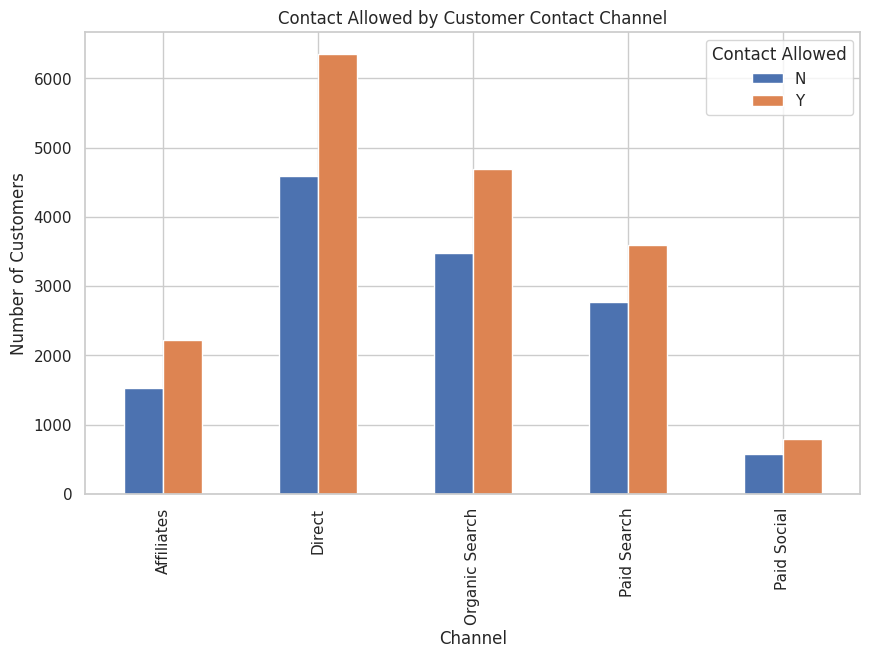

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

# Example data for Contact Allowed distribution (replace with actual data)
contact_allowed_data = pd.DataFrame({
    'Source of Customer': ['Affiliates', 'Affiliates', 'Direct', 'Direct', 'Organic Search', 'Organic Search', 'Paid Search', 'Paid Search', 'Paid Social', 'Paid Social'],
    'Contact Allowed': ['N', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y'],
    'count': [1529, 2227, 4590, 6351, 3478, 4686, 2766, 3588, 580, 796]
})

# Pivot the data to create separate bars for 'Y' and 'N'
pivoted_data = contact_allowed_data.pivot(index='Source of Customer', columns='Contact Allowed', values='count')

# Plot the data using a bar chart
pivoted_data.plot(kind='bar', stacked=False, figsize=(10, 6))

# Add titles and labels
plt.title('Contact Allowed by Customer Contact Channel')
plt.xlabel('Channel')
plt.ylabel('Number of Customers')

# Show the static plot
plt.show()


This chart shows the contact allowed distribution for each customer contact channel.
Key takeaways might include:


1.   **Direct Channel Has the Largest Number of Customers:**


*   The Direct channel shows the highest number of customers overall, which shows that the Direct channel brought in a large number of customers. However, a significant portion of these customers have also opted out of receiving further contact.

2.   **Paid Social Has a Smaller but Engaged Audience:**


*   While the Paid Social channel has the smallest number of customers overall, a majority of them allow contact (796 compared to 580 who don’t).




*   Channels like Paid Social, Paid Search, and Organic Search have a higher
proportion of customers who allow contact, offering better opportunities for email marketing, follow-ups, and promotions.
*   The company should focus on leveraging the high contact opt-in rates from these set of customers for personalized and targeted marketing campaigns.

3.   **Maximize Affiliates:**


*   Affiliates also show a balanced distribution, indicating that this channel brings in a good number of customers who can be contacted for future marketing efforts and loyalty programs.


4.   **Leverage Direct and Organic Channels for Mass Marketing: **


*   Since a large proportion of customers from these channels allow contact, they can be effectively used for broad marketing campaigns such as newsletters, promotions, and product launches.







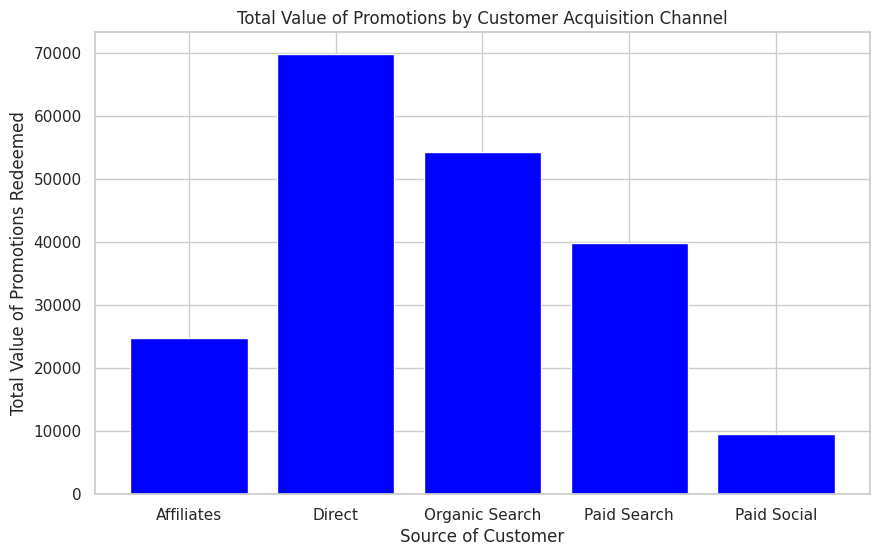

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# Assuming channel_performance DataFrame is already defined

# Create the figure and axis for the static bar chart
plt.figure(figsize=(10, 6))

# Create a bar chart for total value of promotions redeemed by channel
plt.bar(channel_performance['Source of Customer'], channel_performance['sum_total_promotions'], color='blue')

# Customize the chart
plt.title('Total Value of Promotions by Customer Acquisition Channel')
plt.xlabel('Source of Customer')
plt.ylabel('Total Value of Promotions Redeemed')

# Display the static plot
plt.show()


The Total Promotions Loss represents the total value of discounts and promotions that customers have redeemed across their orders. This essentially reflects the amount of potential revenue that was "lost" due to promotional activities (discounts, coupons, special offers, etc.). Here's what this metric can tell us based on the above chart:


1.   **Higher Promotion Loss for High-Volume Channels:**


*   Channels like Direct, Organic Search, and Paid Search typically show higher total promotion losses. This is expected since these channels bring in more customers and a higher volume of orders, leading to more opportunities for customers to redeem promotions.
*   Direct, in particular, might have the highest promotional loss, which suggests a large portion of these customers rely on discounts for their purchases.


2.   **Paid Social May Have Lower Promotion Loss:**


*   Even though Paid Social shows a high subsequent profit per customer, it likely incurs lower promotional losses compared to higher-volume channels. This suggests that customers acquired through Paid Social may be more inclined to purchase at full price or with minimal discounts
*   This could indicate a stronger customer loyalty or higher engagement from this channel, making it more profitable in terms of promotions spent versus profit earned.


3.   **Affiliates:**


*   The Affiliates channel might also show significant promotion loss, as affiliate partnerships often rely on discounts or coupon codes to attract customers. However, if the promotion loss is high but the overall profit remains low, it suggests that these promotions are not driving high-value repeat behavior.


This could indicate for the business a **heavy dependency on promotions** using Direct and Search channels to drive sales. This can reduce overall profitability, as customers in these channels may wait for promotions or only purchase when discounts are available. The operator may need to rethink its promotion strategy, especially for high-volume channels.







# **Observations:**


*   Customers acquired through **Paid Social** make fewer subsequent orders but generate significantly **higher subsequent profits** compared to other channels
*   The Direct, Organic Search, and Paid Search channels drive the **highest total number of subsequent orders** but have relatively lower subsequent profit margins.


*   The Affiliates channel generates a moderate number of subsequent orders, but it has lower profitability compared to other channels.
*   A significant proportion of customers **allow contact**, especially in Direct, Paid Search, and Organic Search channels and leveraging these based on customer behavoir, increases engagement and repeat purchases through tailored communication strategies


*    Promotions are being redeemed across all channels, but they reduce the **profitability of subsequent orders**, particularly for channels like Direct and Affiliates.







.


## Analyzing Demographic Differences

## **1. Age-Based Differences**

In [ ]:
#Lets bring back our merged data to go though the data again
merged_data_df.head()

,Customer ID,1st Order Profit,Subsequent Order Profit,Subsequent Orders Count,Total value of all promotions,Title,Date Of Birth,Address City,Contact Allowed,Registration Date,Source of Customer
0,1,9.0,5.0,1,7.0,Mr,1973-06-29,Malahide,Y,2013-01-01 00:23:00,Organic Search
1,2,8.0,70.0,7,7.0,Mr,1984-07-25,Dublin,Y,2013-01-01 00:30:00,Affiliates
2,3,14.0,51.0,7,0.0,Mr,1991-05-01,Dublin,Y,2013-01-01 01:09:00,Paid Social
3,4,14.0,0.0,0,0.0,Mr,1986-11-30,Dublin,N,2013-01-01 01:19:00,Affiliates
4,5,23.0,68.0,9,15.0,Mr,1991-10-02,Limerick,Y,2013-01-01 01:58:00,Paid Search


In [ ]:
#  For his section we are gonna calculate the age of each customer as of June 30th, 2013
merged_data_df['Age'] = 2013 - merged_data_df['Date Of Birth'].dt.year
merged_data_df.head()


,Customer ID,1st Order Profit,Subsequent Order Profit,Subsequent Orders Count,Total value of all promotions,Title,Date Of Birth,Address City,Contact Allowed,Registration Date,Source of Customer,Age
0,1,9.0,5.0,1,7.0,Mr,1973-06-29,Malahide,Y,2013-01-01 00:23:00,Organic Search,40
1,2,8.0,70.0,7,7.0,Mr,1984-07-25,Dublin,Y,2013-01-01 00:30:00,Affiliates,29
2,3,14.0,51.0,7,0.0,Mr,1991-05-01,Dublin,Y,2013-01-01 01:09:00,Paid Social,22
3,4,14.0,0.0,0,0.0,Mr,1986-11-30,Dublin,N,2013-01-01 01:19:00,Affiliates,27
4,5,23.0,68.0,9,15.0,Mr,1991-10-02,Limerick,Y,2013-01-01 01:58:00,Paid Search,22


In [ ]:
# Lets group customers into age bands (e.g., 18-25, 26-35, etc.) and analyse the profitability, promotion ssage and subsequent orders based on each age band.
#Calculate metrics such as:
  #Average profit per customer by age group.
  #Average number of subsequent orders per age group.
  #Total promotions redeemed by age group.

# Group customers into age bands
age_bins = [18, 25, 35, 45, 55, 65, 100]
age_labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
merged_data_df['Age Group'] = pd.cut(merged_data_df['Age'], bins=age_bins, labels=age_labels)

In [ ]:
# Analyze profitability and orders by age group
age_group_analysis = merged_data_df.groupby('Age Group').agg(
    avg_first_order_profit=('1st Order Profit', 'mean'),
    avg_subsequent_order_profit=('Subsequent Order Profit', 'mean'),
    sum_subsequent_orders=('Subsequent Orders Count', 'sum'),
    sum_total_promotions=('Total value of all promotions', 'sum')
).reset_index()

# Display the result
print(age_group_analysis)

  Age Group  avg_first_order_profit  avg_subsequent_order_profit  \
0     18-24                9.163276                    31.773177   
1     25-34                9.890238                    35.455084   
2     35-44               11.708729                    40.506507   
3     45-54               13.500488                    46.518699   
4     55-64               12.539192                    42.487728   
5       65+               12.947266                    42.611328   

   sum_subsequent_orders  sum_total_promotions  
0                  22648               36508.0  
1                  54458               87325.0  
2                  27494               43801.0  
3                  12395               19835.0  
4                   5031                7551.0  
5                   1993                3027.0  


<ipython-input-224-e7c9b5c8d8a8>:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



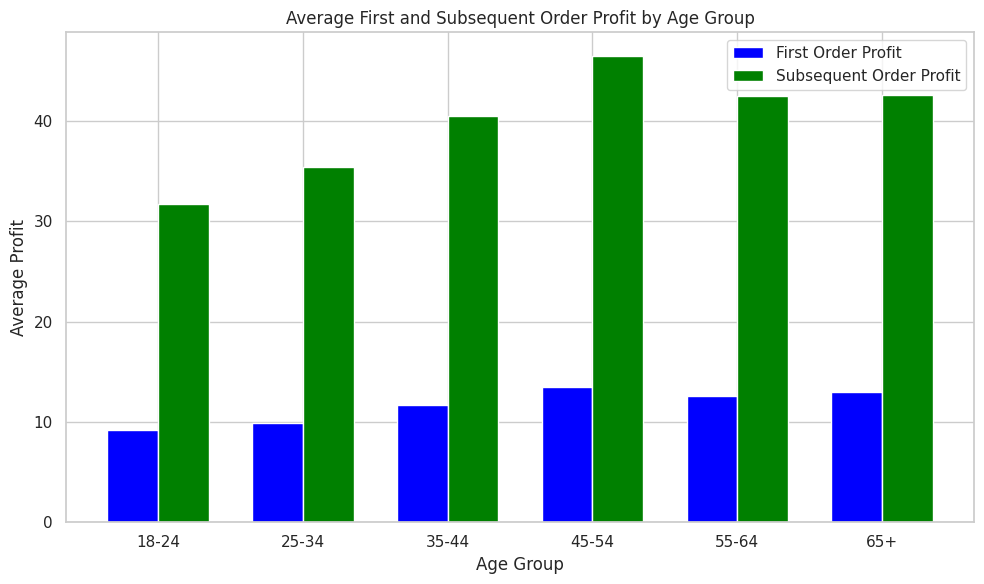

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
# Define the data
age_groups = age_group_analysis['Age Group']
first_order_profit = age_group_analysis['avg_first_order_profit']
subsequent_order_profit = age_group_analysis['avg_subsequent_order_profit']

# Create the figure and axis for the static bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Set the positions and width for the bars
bar_width = 0.35
index = np.arange(len(age_groups))

# Create the bars for first order profit
ax.bar(index, first_order_profit, bar_width, label='First Order Profit', color='blue')

# Create the bars for subsequent order profit
ax.bar(index + bar_width, subsequent_order_profit, bar_width, label='Subsequent Order Profit', color='green')

# Add labels, title, and legend
ax.set_xlabel('Age Group')
ax.set_ylabel('Average Profit')
ax.set_title('Average First and Subsequent Order Profit by Age Group')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(age_groups)
ax.legend()

# Display the static plot
plt.tight_layout()
plt.show()


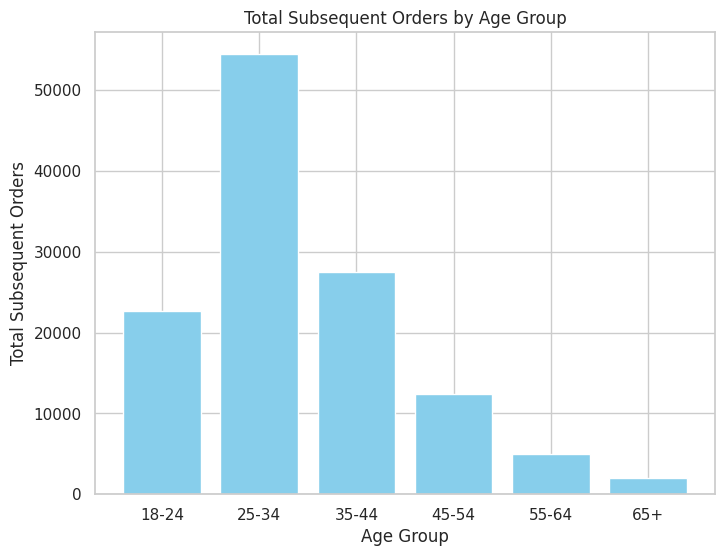

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# Create a static bar chart for total subsequent orders by age group
plt.figure(figsize=(8, 6))

# Plot the bar chart
plt.bar(age_group_analysis['Age Group'], age_group_analysis['sum_subsequent_orders'], color='skyblue')

# Customize the chart
plt.title('Total Subsequent Orders by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Subsequent Orders')

# Show the static plot
plt.show()


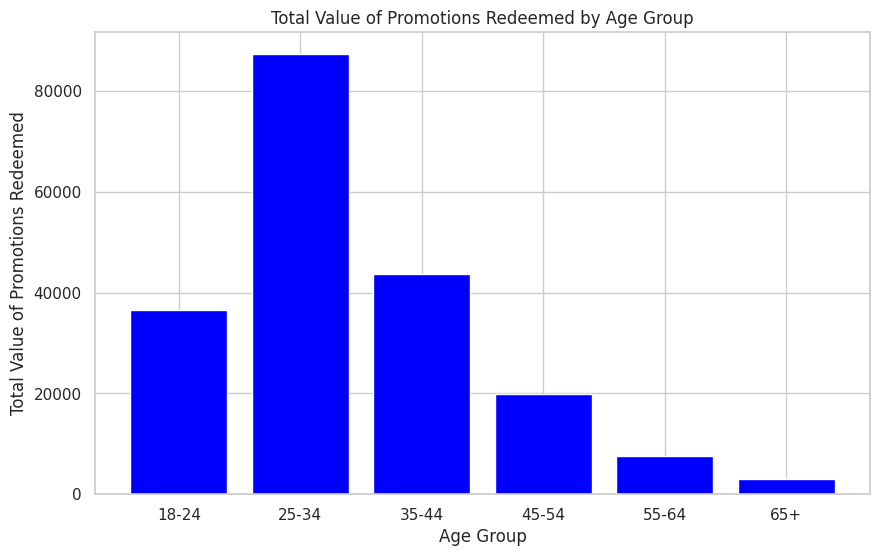

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

# Assuming 'age_group_analysis' DataFrame is already defined

# Create a figure and axis for the static bar chart
plt.figure(figsize=(10, 6))

# Create a bar chart for total value of promotions redeemed by age group
plt.bar(age_group_analysis['Age Group'], age_group_analysis['sum_total_promotions'], color='blue')

# Customize the chart
plt.title('Total Value of Promotions Redeemed by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Value of Promotions Redeemed')

# Display the static plot
plt.show()



# **Observations:**

*   **Age-Based Profitability:** Older age groups (e.g., 45-54 and 55-64) tend to have higher average first and subsequent order profits compared to younger customers. This suggests that older customers are placing higher-value orders.
*   **Order Volume:** Younger age groups (e.g., 25-34) have the highest total subsequent orders, suggesting they are more likely to make repeat purchases. However, their order value might be lower on average.
*   **Promotion Usage:** Younger customers (especially 25-34 age group) tend to redeem more promotions, which could indicate a higher price sensitivity. On the other hand, older customers, while fewer in number, redeem fewer promotions but place higher-value orders.






## **2. Contact Behaviour:**

In [ ]:
# Lets group customers into Contact Behaviour and analyse the profitability, promotion usage and subsequent orders based on whether customers allowed contact ("Contact Allowed" = Y or N).

In [ ]:
# Group by 'Contact Allowed' and calculate average profits, subsequent orders, and promotions
contact_analysis = merged_data_df.groupby('Contact Allowed').agg(
    avg_first_order_profit=('1st Order Profit', 'mean'),
    avg_subsequent_order_profit=('Subsequent Order Profit', 'mean'),
    sum_subsequent_orders=('Subsequent Orders Count', 'sum'),
    sum_total_promotions=('Total value of all promotions', 'sum')
).reset_index()

# Display the results
print(contact_analysis)


  Contact Allowed  avg_first_order_profit  avg_subsequent_order_profit  \
0               N               10.728425                    28.874990   
1               Y               10.658715                    43.718155   

   sum_subsequent_orders  sum_total_promotions  
0                  41635               84168.0  
1                  82384              113879.0  


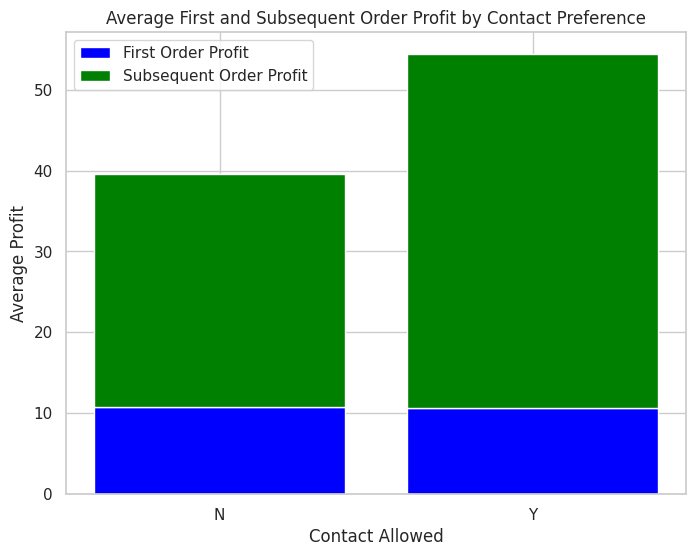

In [ ]:
%matplotlib inline
# Convert the interactive Plotly chart to a static Matplotlib bar chart using the same variable names

import matplotlib.pyplot as plt

# Create the figure for the static bar chart
plt.figure(figsize=(8, 6))

# Add First Order Profit bars
plt.bar(contact_analysis['Contact Allowed'], contact_analysis['avg_first_order_profit'], label='First Order Profit', color='blue')

# Add Subsequent Order Profit bars stacked on top of First Order Profit bars
plt.bar(contact_analysis['Contact Allowed'], contact_analysis['avg_subsequent_order_profit'], bottom=contact_analysis['avg_first_order_profit'], label='Subsequent Order Profit', color='green')

# Customize layout
plt.title('Average First and Subsequent Order Profit by Contact Preference')
plt.xlabel('Contact Allowed')
plt.ylabel('Average Profit')

# Add legend
plt.legend()

# Show the static plot
plt.show()


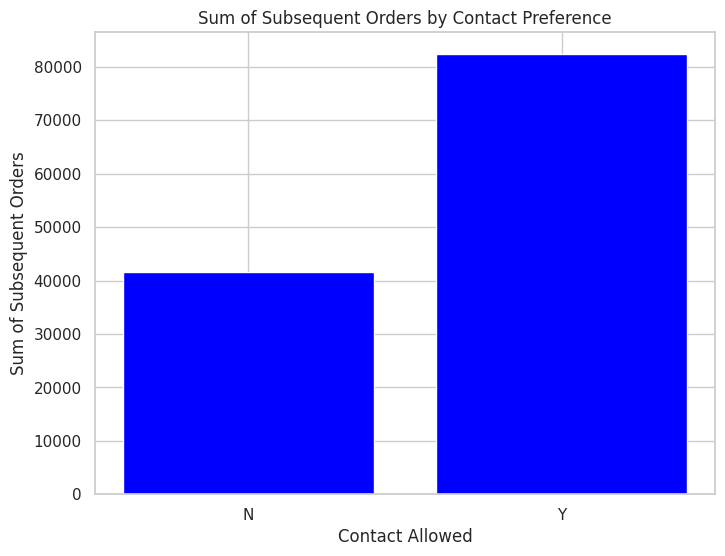

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# Create the figure and axis for the static bar chart
plt.figure(figsize=(8, 6))

# Create a bar chart for sum of subsequent orders by contact preference
plt.bar(contact_analysis['Contact Allowed'], contact_analysis['sum_subsequent_orders'], color='blue')

# Customize the chart
plt.title('Sum of Subsequent Orders by Contact Preference')
plt.xlabel('Contact Allowed')
plt.ylabel('Sum of Subsequent Orders')

# Display the static plot
plt.show()


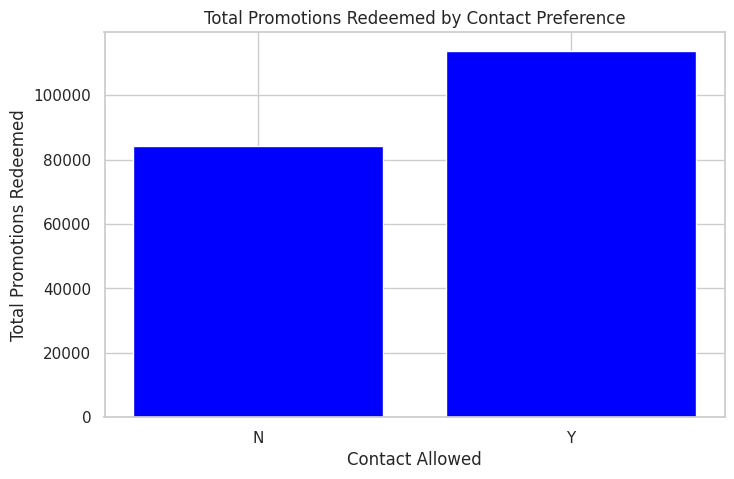

In [ ]:
# Convert the interactive Plotly chart to a static Matplotlib chart
import matplotlib.pyplot as plt
%matplotlib inline

# Create the figure and axis for the static bar chart
plt.figure(figsize=(8, 5))

# Create a bar chart for total promotions redeemed by contact preference
plt.bar(contact_analysis['Contact Allowed'], contact_analysis['sum_total_promotions'], color='blue')

# Customize the chart
plt.title('Total Promotions Redeemed by Contact Preference')
plt.xlabel('Contact Allowed')
plt.ylabel('Total Promotions Redeemed')

# Display the static plot
plt.show()




1.   **Profitability of Customers Allowing Contact:**


*   The difference in first-order profit is minimal, indicating that the initial purchase behavior is similar for both groups.
*   However, for subsequent orders, customers who opt-in for contact have a significantly higher average subsequent order profit compared to those who opt-out. This suggests that customers who allow contact are more valuable over the long term. They place higher-value repeat orders, making them a critical segment to focus on for personalized and ongoing marketing campaigns.

2.   **Behavioral Differences:**


*   Customers who allow contact are not only making higher-value purchases but also returning more frequently. This behavior highlights the importance of maintaining engagement with customers through email marketing and other communication strategies.

3.  **Promotion Usage:**


*   Customers who allow contact are more likely to redeem promotions. This suggests that opt-in customers respond well to promotional offers, and marketing strategies that incorporate targeted promotions could further increase engagement and profitability for this segment.

*   However, over-reliance on promotions could also reduce profitability, so it’s important to ensure that promotions for this group drive high-value behavior rather than discount-seeking.






